In [1]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit2020_csv = "MetroTransit_2020.csv"

# Read with Pandas
metrotransit2020_df = pd.read_csv(metrotransit2020_csv)
metrotransit2020_df.head()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
0,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,1.0,19337,Leamington Ramp & Lower - Gate #7,114.650000,24.766667
1,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,2.0,19277,3rd Ave S & 11th St S,10.366667,2.733333
2,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,3.0,41911,2nd Ave S & Convention Center,35.000000,1.166667
3,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,4.0,17988,Nicollet Mall & Alice Rainville,119.566667,3.533333
4,5,1/27/2020,WK,CoreLoc,10,North,96,96.0,5.0,17990,Nicollet Mall & 11th St S,140.816667,4.050000


In [2]:
metrotransit2020_df["week_of"]= pd.to_datetime(metrotransit2020_df["week_of"])
metrotransit2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176177 entries, 0 to 176176
Data columns (total 13 columns):
week           176177 non-null int64
week_of        176177 non-null datetime64[ns]
srv            176177 non-null object
route_class    176177 non-null object
line_id        176177 non-null int64
dir            176177 non-null object
trip_cnt       176177 non-null int64
obs_trips      175855 non-null float64
seq            175855 non-null float64
site_id        176177 non-null int64
location       176177 non-null object
ons            175855 non-null float64
offs           175855 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 17.5+ MB


In [4]:
# Line plot showing week-to-week change for highest ON location
highest_on_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="7th & Nicollet Station"]
# highest_on_df
clean_highest_on_df = pd.DataFrame(highest_on_df,columns=["week_of","ons","offs","trip_cnt"])
clean_highest_on_df
# summary_ons = clean_highest_on_df.groupby("week_of")
# summary_ons.head()

,week_of,ons,offs,trip_cnt
2496,2020-01-27,161.566667,26.300000,35
2497,2020-01-27,161.566667,26.300000,35
5648,2020-01-27,0.000000,9.550000,5
6193,2020-01-27,0.200000,16.850000,4
7080,2020-01-27,469.916667,508.533333,124
...,...,...,...,...
168800,2020-04-13,171.083333,196.000000,82
168801,2020-04-13,85.750000,100.666667,82
173152,2020-04-13,5.166667,2.000000,3
176058,2020-04-13,473.583333,61.500000,87


In [30]:
# group by "week of"
summary_ons = clean_highest_on_df.groupby("week_of")

# then do the math
ons_sum = summary_ons["ons"].sum()
trips_sum = summary_ons["trip_cnt"].sum()
pct_chg_ons = ons_sum.pct_change()
pct_chg_ons_trips = trips_sum.pct_change()

summary_table_ons = (pd.DataFrame({
    "Ons": ons_sum,
    "Pct Chng Ons": pct_chg_ons,
    "Trips": trips_sum,
    "Pct Chng Trips": pct_chg_ons_trips
})).round(2)
# summary_table["week_of"] = pd.to_datetime("week_of")
# summary_table["week_of"] = summary_table["week_of"].astype('datetime64[ns]') 

summary_table_ons

,Ons,Pct Chng Ons,Trips,Pct Chng Trips
week_of,,,,
2020-01-27,3406.72,NaN,549,NaN
2020-02-03,3469.03,0.02,549,0.00
2020-02-10,3333.47,-0.04,549,0.00
2020-02-17,3154.35,-0.05,549,0.00
2020-02-24,3497.45,0.11,549,0.00
2020-03-02,3517.12,0.01,549,0.00
2020-03-09,3342.85,-0.05,549,0.00
2020-03-16,2233.50,-0.33,549,0.00
2020-03-30,1513.33,-0.32,406,-0.26


<IPython.core.display.Javascript object>


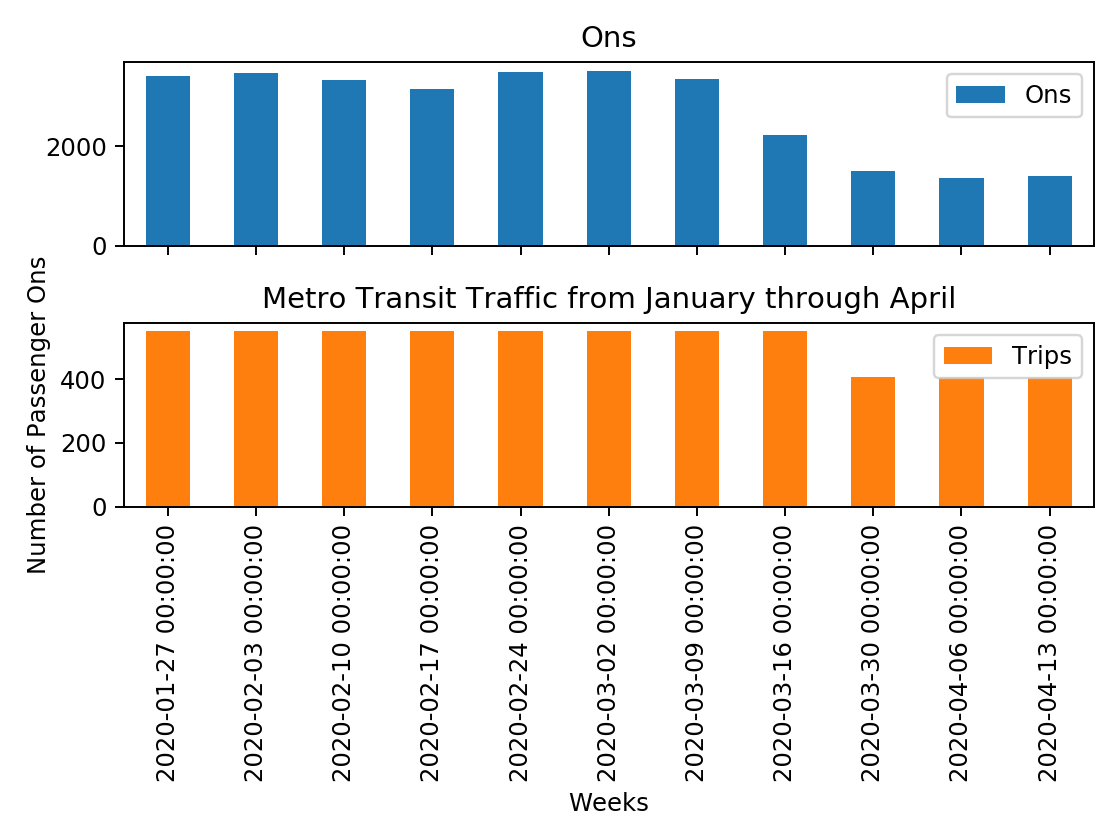

In [29]:
summary_table_ons.plot(kind="bar", subplots=True)
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Passenger Ons")
plt.show()
plt.tight_layout()

In [19]:
# Line plot showing week-to-week change for highest OFF location

highest_off_df = metrotransit2020_df.loc[metrotransit2020_df["location"]=="Nicollet Mall & 7th St S"]
clean_highest_off_df = pd.DataFrame(highest_off_df,columns=["week_of","ons","offs","trip_cnt"])
clean_highest_off_df
# summary_ons = clean_highest_on_df.groupby("week_of")
# summary_ons.head()

,week_of,ons,offs,trip_cnt
6,2020-01-27,575.116667,67.683333,99
205,2020-01-27,111.600000,536.316667,96
255,2020-01-27,267.400000,255.900000,66
347,2020-01-27,202.983333,255.716667,66
794,2020-01-27,9.483333,153.016667,19
...,...,...,...,...
168422,2020-04-13,47.583333,46.416667,56
169925,2020-04-13,49.833333,117.750000,70
169967,2020-04-13,81.500000,43.666667,70
170100,2020-04-13,46.583333,4.166667,35


In [20]:
# group by "week of"
summary_offs = clean_highest_off_df.groupby("week_of")

# then do the math
offs_sum = summary_offs["offs"].sum()
trips_sum = summary_offs["trip_cnt"].sum()

summary_table_offs = (pd.DataFrame({
    "Offs": offs_sum,
    "Trips": trips_sum
})).round(2)
# summary_table["week_of"] = pd.to_datetime("week_of")
# summary_table["week_of"] = summary_table["week_of"].astype('datetime64[ns]') 

summary_table_offs

,Offs,Trips
week_of,,
2020-01-27,5056.53,1342
2020-02-03,5097.67,1342
2020-02-10,4826.62,1342
2020-02-17,4672.38,1342
2020-02-24,4963.33,1342
2020-03-02,4996.38,1342
2020-03-09,4514.82,1342
2020-03-16,2230.22,1342
2020-03-30,1407.15,947


<IPython.core.display.Javascript object>


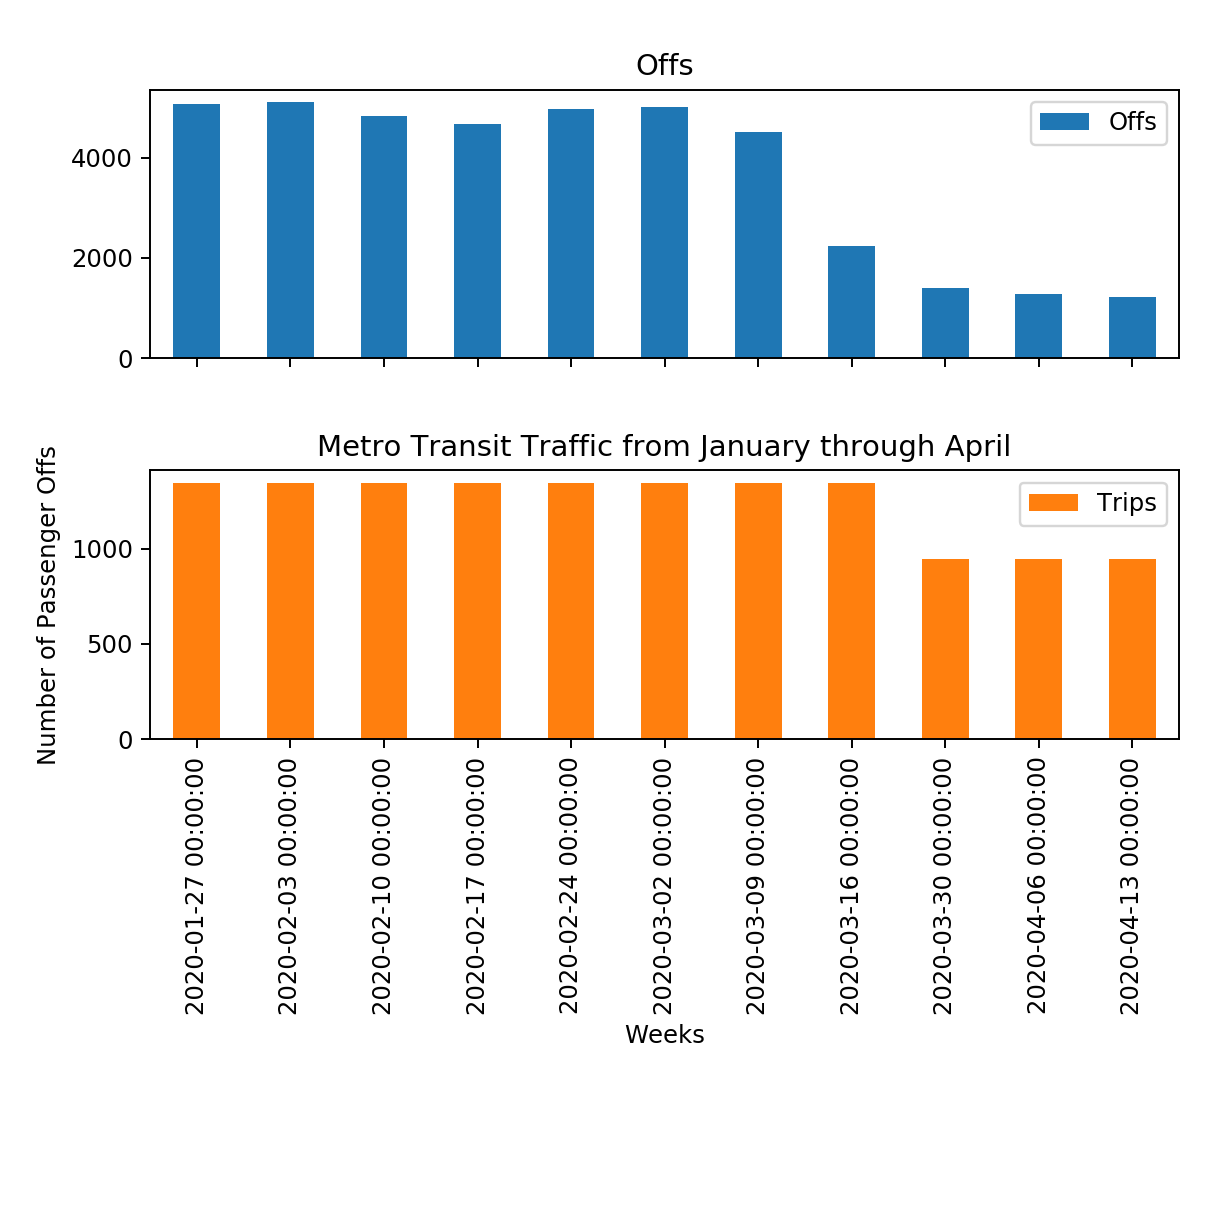

In [21]:
summary_table_offs.plot(kind="bar", subplots=True)
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Passenger Offs")
plt.show()
plt.tight_layout()

In [31]:
total_2020_df = pd.DataFrame(metrotransit2020_df,columns=["week_of","ons","offs","trip_cnt"])
total_2020_df

,week_of,ons,offs,trip_cnt
0,2020-01-27,114.650000,24.766667,96
1,2020-01-27,10.366667,2.733333,96
2,2020-01-27,35.000000,1.166667,96
3,2020-01-27,119.566667,3.533333,96
4,2020-01-27,140.816667,4.050000,96
...,...,...,...,...
176172,2020-04-13,2.333333,16.166667,38
176173,2020-04-13,0.666667,6.166667,38
176174,2020-04-13,1.083333,87.583333,38
176175,2020-04-13,1.666667,19.666667,38


In [32]:
# group by "week of"
total_summary = total_2020_df.groupby("week_of")

# then do the math
total_ons = total_summary["ons"].sum()
total_offs = total_summary["offs"].sum()
total_trips = total_summary["trip_cnt"].sum()
total_pct_chg_ons = total_ons.pct_change()
total_pct_chg_offs = total_offs.pct_change()
total_pct_chg_ons_trips = total_trips.pct_change()

total_summary_df = (pd.DataFrame({
    "Ons": total_ons,
    "Offs": total_offs,
    "Trips": total_trips,
    "Pct Chng Ons": total_pct_chg_ons,
    "Pct Chng Offs": total_pct_chg_offs,
    "Pct Chng Trips": total_pct_chg_ons_trips
})).round(2)
# summary_table["week_of"] = pd.to_datetime("week_of")
# summary_table["week_of"] = summary_table["week_of"].astype('datetime64[ns]') 

total_summary_df

,Ons,Offs,Trips,Pct Chng Ons,Pct Chng Offs,Pct Chng Trips
week_of,,,,,,
2020-01-27,205840.31,205946.45,423834,NaN,NaN,NaN
2020-02-03,208265.29,208968.21,423834,0.01,0.01,0.00
2020-02-10,193881.64,194094.32,423834,-0.07,-0.07,0.00
2020-02-17,190352.33,190911.15,423787,-0.02,-0.02,-0.00
2020-02-24,206849.52,207692.58,423787,0.09,0.09,0.00
2020-03-02,207250.82,208341.83,423787,0.00,0.00,0.00
2020-03-09,186126.18,187090.07,423787,-0.10,-0.10,0.00
2020-03-16,102961.60,102548.90,423093,-0.45,-0.45,-0.00
2020-03-30,70340.13,67251.55,302520,-0.32,-0.34,-0.28


<IPython.core.display.Javascript object>


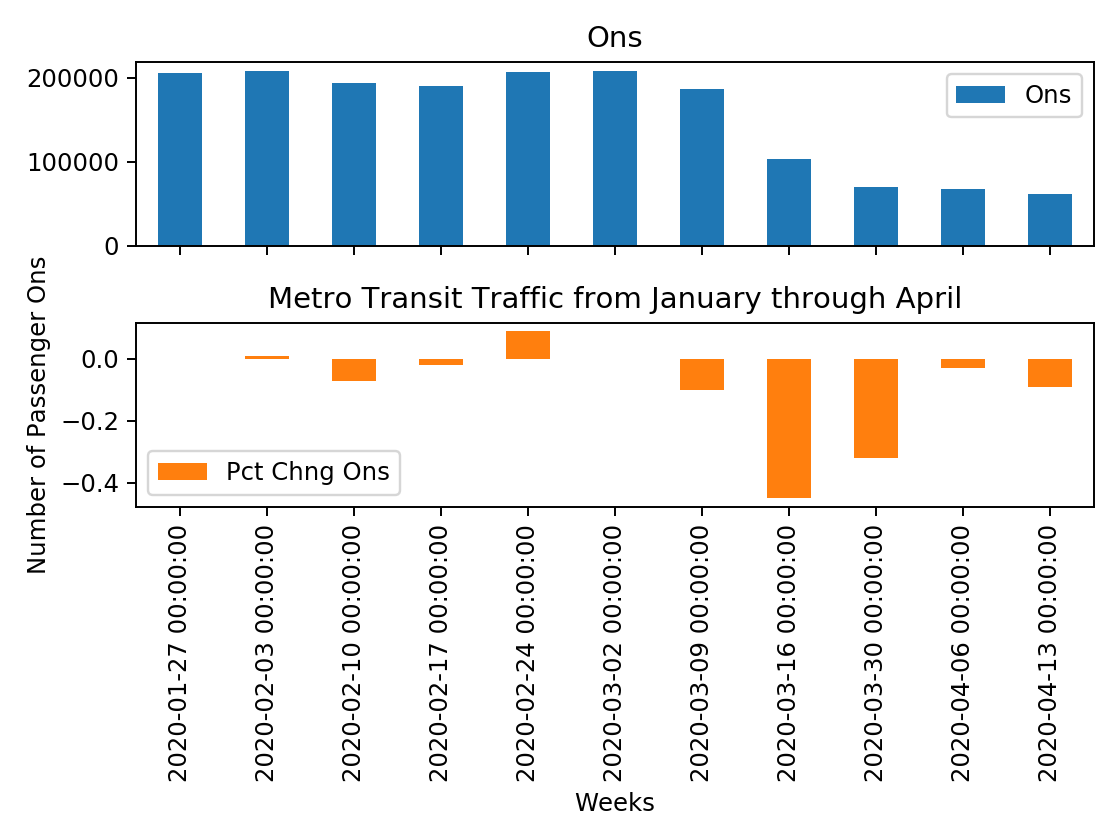

In [34]:
# Bar chart for just ons
total_summary_ons_df = (pd.DataFrame({
    "Ons": total_ons,
    "Pct Chng Ons": total_pct_chg_ons
})).round(2)

total_summary_ons_df.plot(kind="bar", subplots=True)
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Passenger Ons")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


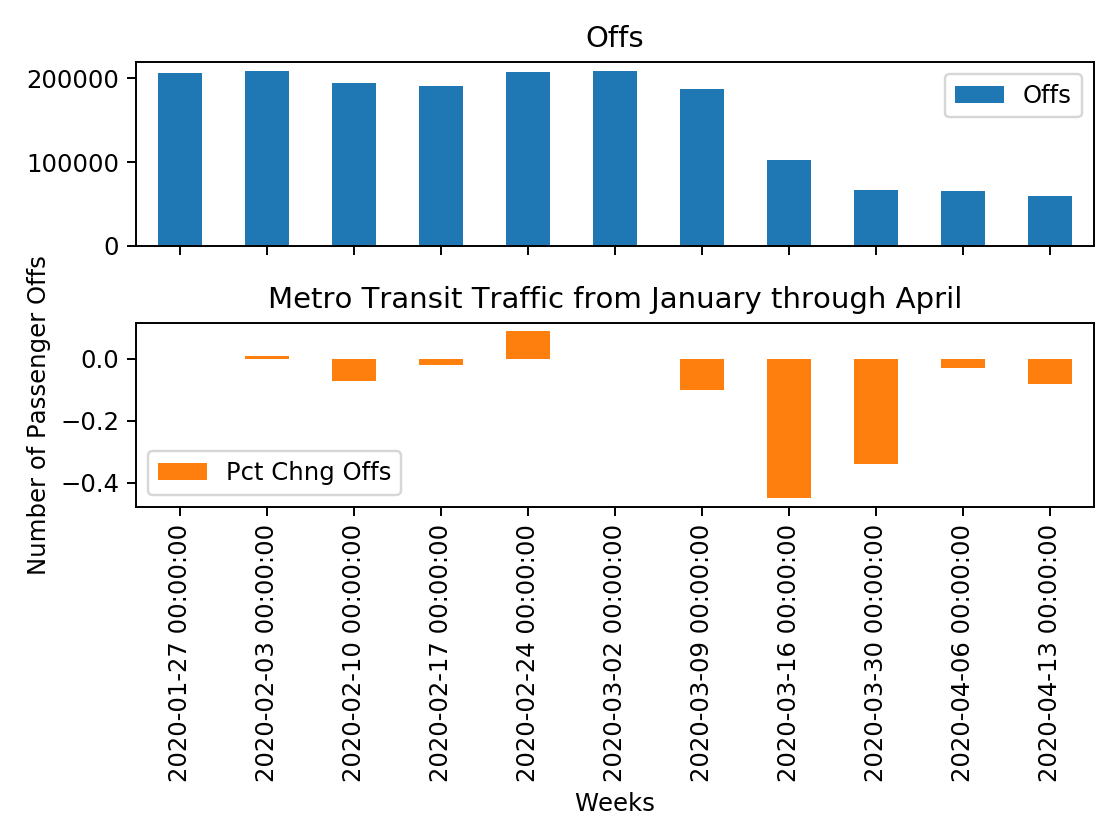

In [35]:
# Bar chart for just offs
total_summary_offs_df = (pd.DataFrame({
    "Offs": total_offs,
    "Pct Chng Offs": total_pct_chg_offs
})).round(2)

total_summary_offs_df.plot(kind="bar", subplots=True)
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Passenger Offs")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


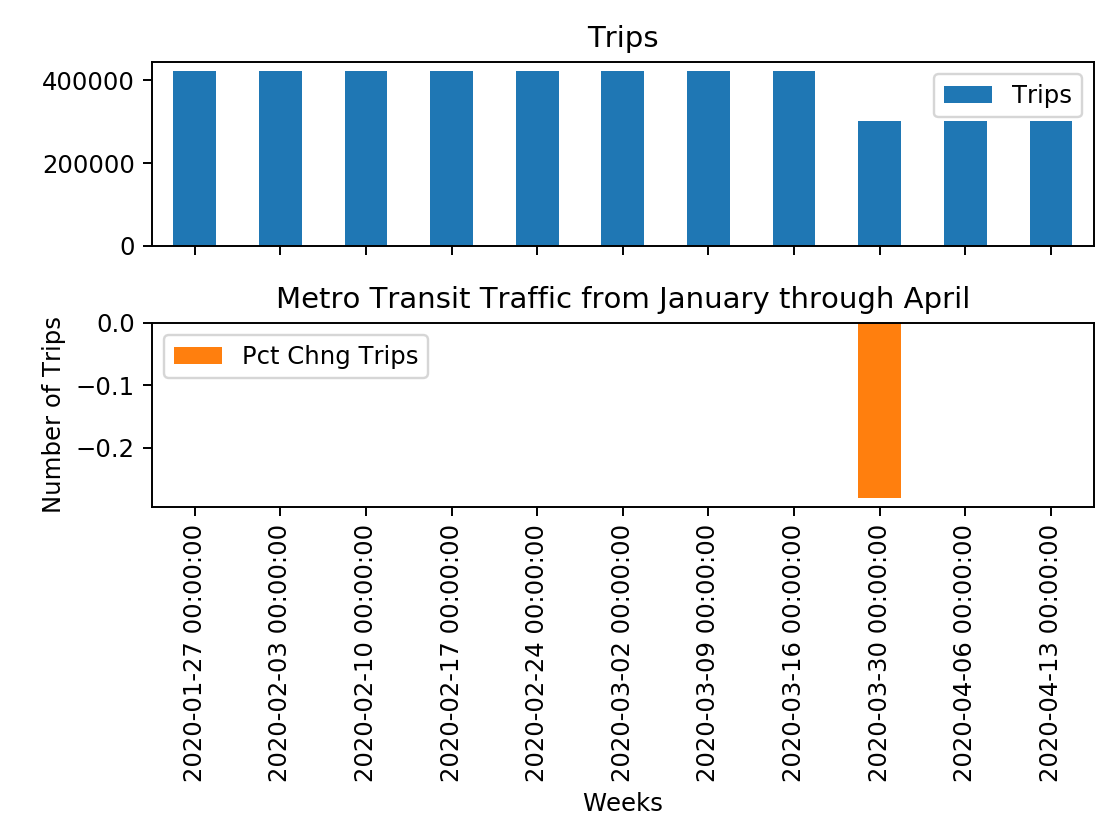

In [36]:
# Bar chart for just ons
total_summary_trips_df = (pd.DataFrame({
    "Trips": total_trips,
    "Pct Chng Trips": total_pct_chg_ons_trips
})).round(2)

total_summary_trips_df.plot(kind="bar", subplots=True)
plt.title("Metro Transit Traffic from January through April")
plt.xlabel("Weeks")
plt.ylabel("Number of Trips")
plt.show()
plt.tight_layout()